In [234]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

#### 1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [201]:
customer=pd.read_csv('Customer.csv')

In [202]:
transactions=pd.read_csv('Transactions.csv')

In [203]:
product=pd.read_csv('prod_cat_info.csv')

In [204]:
Customer_Final=transactions.merge(product,
                          left_on=['prod_cat_code','prod_subcat_code'], #transaction df
                          right_on=['prod_cat_code','prod_sub_cat_code'], #products df
                          how='inner').merge(customer,
                                            left_on='cust_id',
                                            right_on='customer_Id',
                                            how='inner')

In [205]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,22-05-1970,M,2.0


In [232]:
Customer_Final["DOB"] = pd.to_datetime(Customer_Final["DOB"], format="%d-%m-%Y")

In [246]:
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"],dayfirst=True,errors='coerce')

##### 2. Prepare a summary report for the merged data set.

##### a. Get the column names and their corresponding data types

In [206]:
Customer_Final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object

##### b.Top/Bottom 10 observations

In [207]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,269014,27-11-1979,F,3.0


In [208]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children,271961,15-01-1982,M,1.0


##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [209]:
five_number_summary=Customer_Final[['Qty','Rate','Tax','total_amt']].describe().loc[['min','25%','50%','75%','max']]
five_number_summary

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.350,-8270.925
25%,1.0,312.0,98.280,762.450
50%,3.0,710.0,199.080,1754.740
75%,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


##### d. Frequency tables for all the categorical variables

In [210]:

# Print column names and their data types
print("Column names and their data types:")
print(Customer_Final.dtypes)
print("\n")

# Track the columns being processed
print("Processing columns:")
categorical_columns_processed = []

# Generate frequency tables for categorical variables
for column_name in Customer_Final.columns:
    print(f"Checking column: {column_name} - Type: {Customer_Final[column_name].dtype}")
    if Customer_Final[column_name].dtype == 'object':
        categorical_columns_processed.append(column_name)
        # Generate the frequency table
        freq_table = Customer_Final[column_name].value_counts()
        print(f"Frequency table for column '{column_name}':")
        print(freq_table)
        print("\n")
        
      

Column names and their data types:
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object


Processing columns:
Checking column: transaction_id - Type: int64
Checking column: cust_id - Type: int64
Checking column: tran_date - Type: object
Frequency table for column 'tran_date':
tran_date
13-07-2011    35
21-12-2013    33
23-10-2011    33
22-11-2011    33
25-09-2011    33
              ..
23-02-2014     2
24-02-2014     2
27-02-2014     1
21-02-2014     1
28-02-2014     1
Name: count, Length: 1129, dtype: int64


Checking column: prod_subcat_c

##### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

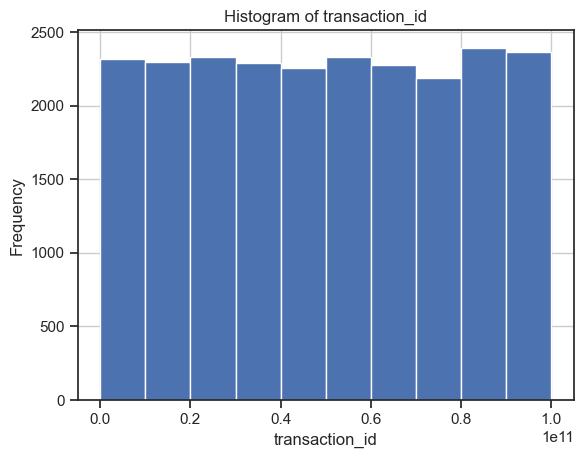

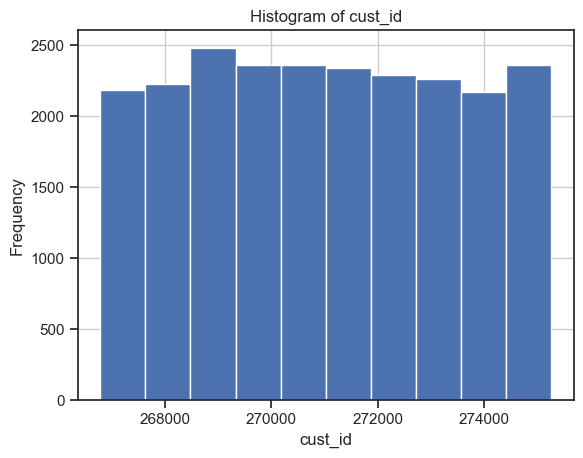

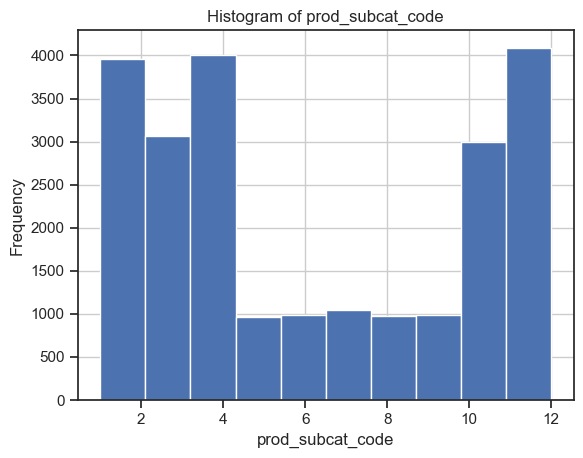

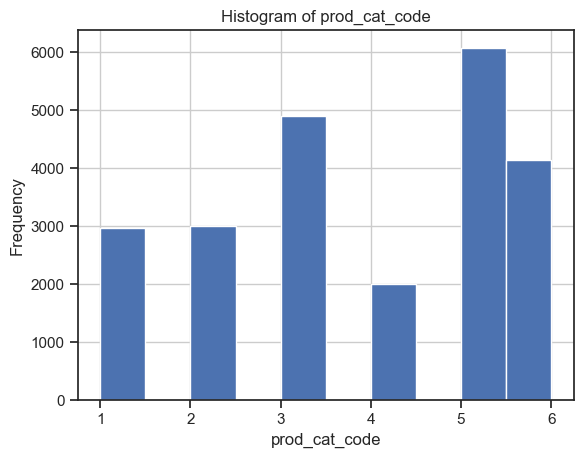

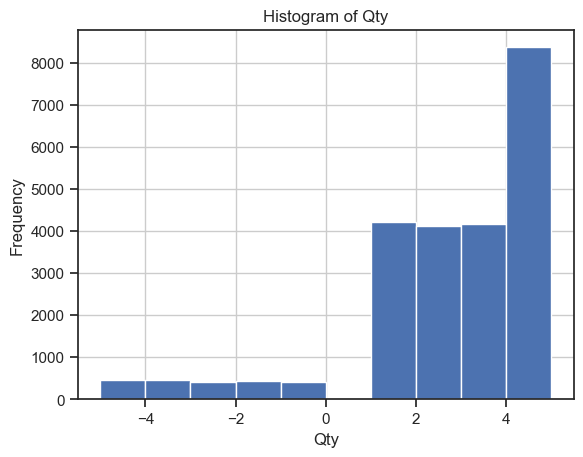

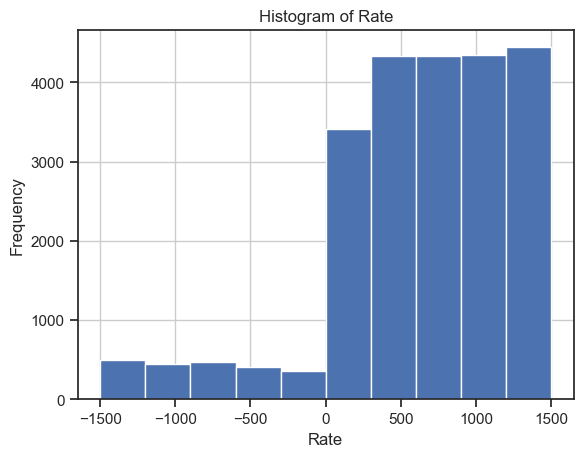

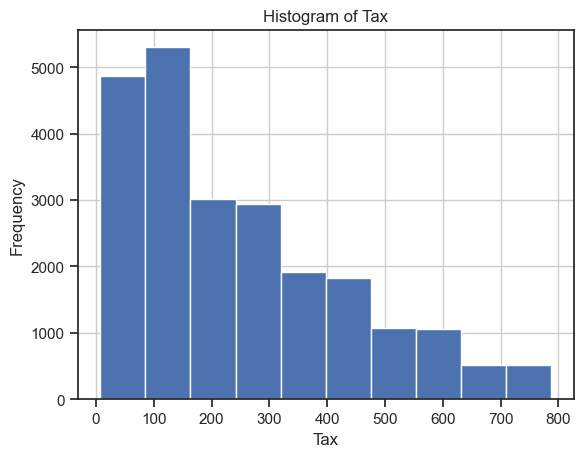

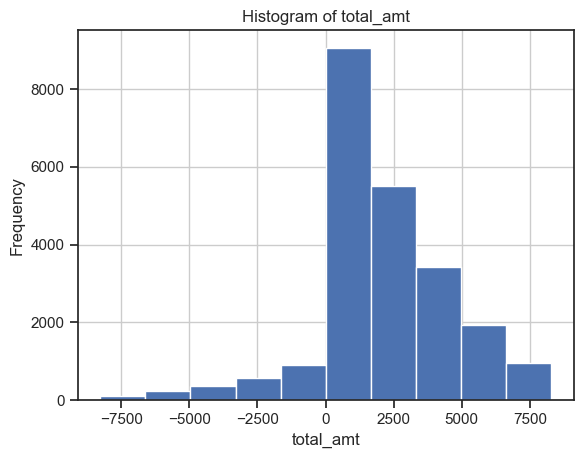

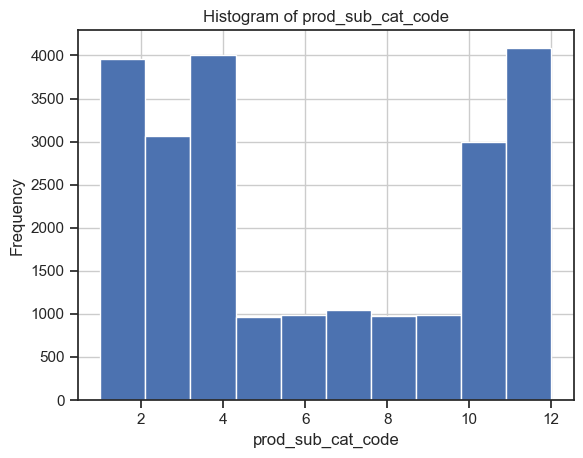

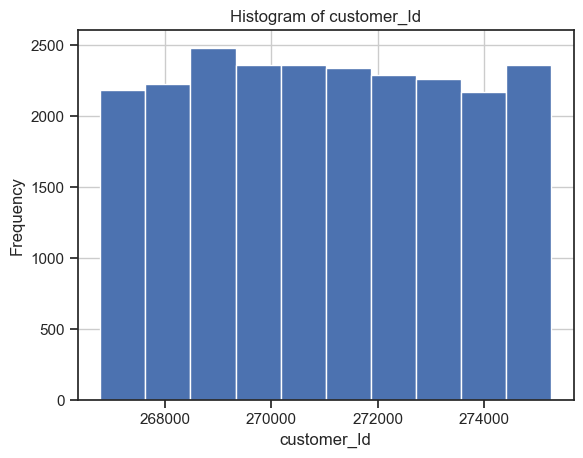

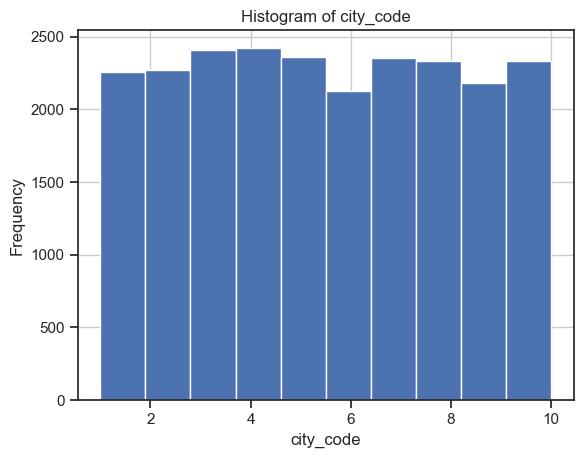

In [211]:
for column_name in Customer_Final.columns:
    if Customer_Final[column_name].dtype !=object:
        #plt.figure(figsize=(8, 6))
        plt.hist(Customer_Final[column_name])
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

Column names and their data types:
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object


Processing columns:
Checking column: transaction_id - Type: int64
Checking column: cust_id - Type: int64
Checking column: tran_date - Type: object
Frequency table for column 'tran_date':
tran_date
13-07-2011    35
21-12-2013    33
23-10-2011    33
22-11-2011    33
25-09-2011    33
              ..
23-02-2014     2
24-02-2014     2
27-02-2014     1
21-02-2014     1
28-02-2014     1
Name: count, Length: 1129, dtype: int64




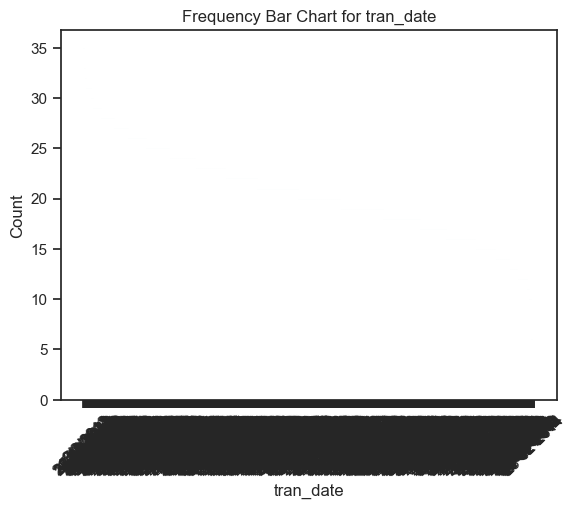

Checking column: prod_subcat_code - Type: int64
Checking column: prod_cat_code - Type: int64
Checking column: Qty - Type: int64
Checking column: Rate - Type: int64
Checking column: Tax - Type: float64
Checking column: total_amt - Type: float64
Checking column: Store_type - Type: object
Frequency table for column 'Store_type':
Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64




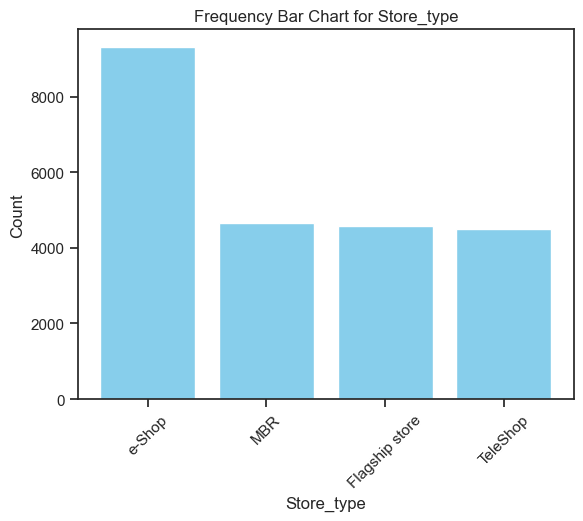

Checking column: prod_cat - Type: object
Frequency table for column 'prod_cat':
prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64




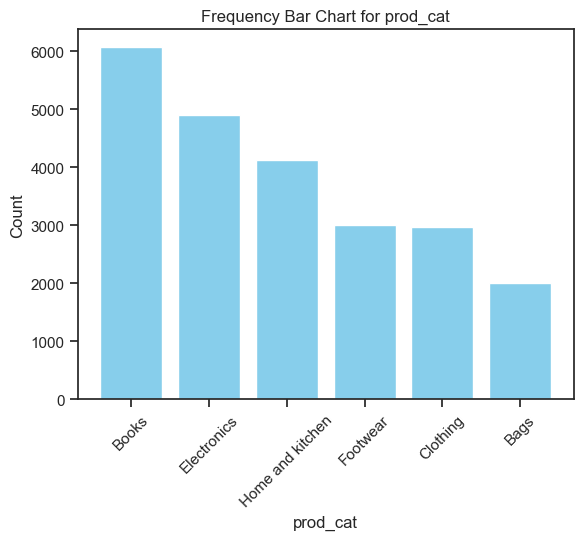

Checking column: prod_sub_cat_code - Type: int64
Checking column: prod_subcat - Type: object
Frequency table for column 'prod_subcat':
prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64




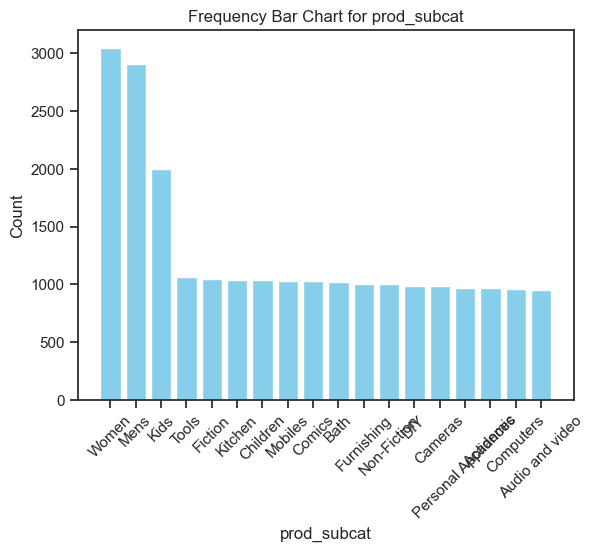

Checking column: customer_Id - Type: int64
Checking column: DOB - Type: object
Frequency table for column 'DOB':
DOB
27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
18-11-1991    24
              ..
29-01-1976     1
01-05-1980     1
23-06-1988     1
25-06-1985     1
10-06-1972     1
Name: count, Length: 3987, dtype: int64




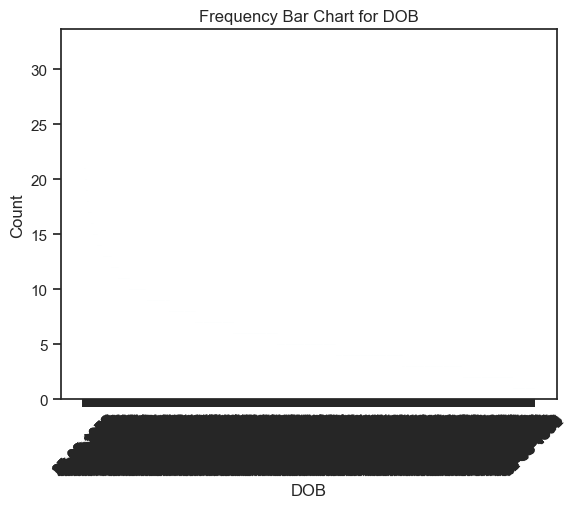

Checking column: Gender - Type: object
Frequency table for column 'Gender':
Gender
M    11811
F    11233
Name: count, dtype: int64




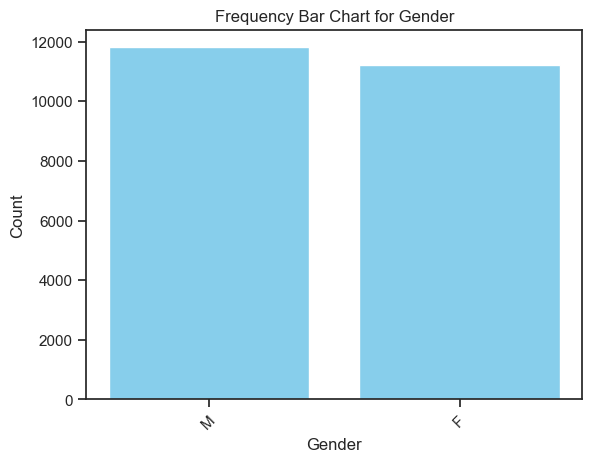

Checking column: city_code - Type: float64
Categorical columns processed: ['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender']


In [212]:
# Print column names and their data types
print("Column names and their data types:")
print(Customer_Final.dtypes)
print("\n")

# Track the columns being processed
print("Processing columns:")
categorical_columns_processed = []

# Generate frequency tables for categorical variables
for column_name in Customer_Final.columns:
    print(f"Checking column: {column_name} - Type: {Customer_Final[column_name].dtype}")
    if Customer_Final[column_name].dtype == 'object':
        categorical_columns_processed.append(column_name)
        # Generate the frequency table
        freq_table = Customer_Final[column_name].value_counts()
        print(f"Frequency table for column '{column_name}':")
        print(freq_table)
        print("\n")
# Plotting the frequency bar chart
        plt.bar(freq_table.index, freq_table.values, color='skyblue')
        plt.title(f'Frequency Bar Chart for {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

print("Categorical columns processed:", categorical_columns_processed)


##### 4. Calculate the following information using the merged dataset :                                                                                                                                    a. Time period of the available transaction data                                                                                                                                                                         

In [ ]:
#Checking for duplicate values
Customer_Final.duplicated().sum()

In [238]:
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"],dayfirst=True,errors='coerce')

In [239]:
Customer_Final.drop_duplicates(inplace=True)
Customer_Final.duplicated().sum()

0

In [240]:
min_date = Customer_Final["tran_date"].min()

In [241]:
max_date = Customer_Final["tran_date"].max()

In [242]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 25-01-2011 to 28-02-2014


##### b. Count of transactions where the total amount of transaction was negative

In [ ]:
(Customer_Final['total_amt']<0).sum()

In [ ]:
len(Customer_Final[Customer_Final['total_amt']<0])

##### 5. Analyze which product categories are more popular among females vs male customers.

In [ ]:
Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()

##### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [ ]:
Customer_Final.groupby('city_code')['cust_id'].count().sort_values(ascending=False)

#### 7. Which store type sells the maximum products by value and by quantity?

In [ ]:
Customer_Final.groupby('Store_type')[['Qty','Rate']].sum().sort_values(by='Qty',ascending=False)

##### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [ ]:
prod_group=round(pd.pivot_table(data=Customer_Final,index='prod_cat',columns='Store_type',values='total_amt',aggfunc='sum'),2)
prod_group

In [ ]:
prod_group.loc[['Electronics','Clothing'],'Flagship store']

##### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [ ]:
gender_group=Customer_Final.pivot_table(index='prod_cat',columns='Gender',values='total_amt',aggfunc='sum')
gender_group

In [ ]:
gender_group.loc['Electronics','M']

#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [ ]:
positive_transactions=Customer_Final.loc[Customer_Final['total_amt']>0,]
positive_transactions

In [ ]:
unique_transactions=positive_transactions.groupby(['cust_id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_transactions

In [ ]:
#unique_transactions_count
unique_transactions_count=unique_transactions.groupby('cust_id')['transaction_id'].count().reset_index()
unique_transactions_count

In [ ]:
#Unique transaction count>10
unique_transactions_count[unique_transactions_count['transaction_id']>10]

##### 11. For all customers aged between 25 - 35, find out:                                                                                                                                                       

##### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [ ]:
now=pd.Timestamp('now')
now

In [217]:
Customer_Final['DOB']=pd.to_datetime(Customer_Final['DOB'], format='%d-%m-%Y')
Customer_Final['DOB']=Customer_Final['DOB'].where(Customer_Final['DOB']<now, Customer_Final['DOB']-dt.timedelta(356.25*100))
Customer_Final['age']=((now-Customer_Final['DOB'])/dt.timedelta(365.25)).astype(int)

In [218]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  object        
 3   prod_subcat_code   23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_cat           23053 non-null  object        
 11  prod_sub_cat_code  23053 non-null  int64         
 12  prod_subcat        23053 non-null  object        
 13  customer_Id        23053 non-null  int64         
 14  DOB   

In [219]:
Customer_Final['age_cat']=pd.cut(Customer_Final['age'],bins=[24,35,46,57], labels=['25-35', '36-46', '47-57'], include_lowest=True)

In [220]:
Customer_25_35=Customer_Final.groupby(['age_cat','prod_cat'])['total_amt'].sum()
Customer_25_35

C:\Users\admin\AppData\Local\Temp\ipykernel_11736\1387590106.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Customer_25_35=Customer_Final.groupby(['age_cat','prod_cat'])['total_amt'].sum()


age_cat  prod_cat        
25-35    Bags                 802108.450
         Books               2424053.970
         Clothing            1356420.650
         Electronics         2079556.960
         Footwear            1294475.455
         Home and kitchen    1700222.615
36-46    Bags                1902071.860
         Books               6084095.745
         Clothing            3067737.465
         Electronics         5180979.245
         Footwear            3016562.705
         Home and kitchen    4092317.775
47-57    Bags                1420528.330
         Books               4314544.325
         Clothing            1826979.375
         Electronics         3461927.430
         Footwear            1908736.115
         Home and kitchen    2646452.900
Name: total_amt, dtype: float64

In [221]:
Customer_25_35.loc['25-35',['Books','Electronics']]

age_cat  prod_cat   
25-35    Books          2424053.97
         Electronics    2079556.96
Name: total_amt, dtype: float64

##### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [244]:
Customer_total_amt_25_35=Customer_Final[Customer_Final['age_cat']=='25-35']
Customer_total_amt_25_35

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,age,age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,31,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,31,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,1,Mens,268509,1989-08-17,M,10.0,34,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,268444,1992-01-02,F,6.0,32,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,3,Women,267058,1992-02-06,F,10.0,32,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,3,Kids,268885,1989-04-14,F,6.0,35,25-35
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,9,Cameras,275227,1989-09-23,M,4.0,34,25-35
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,3,Kids,267094,1992-11-24,M,9.0,31,25-35
23038,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,Bags,4,Women,274306,1989-01-12,M,2.0,35,25-35


In [245]:
total_amount = Customer_total_amt_25_35[(Customer_total_amt_25_35['tran_date'] >='2014-01-01') & (Customer_total_amt_25_35['tran_date'] <='2014-03-01')]
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,age,age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,31,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,31,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,1,Mens,268509,1989-08-17,M,10.0,34,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,268444,1992-01-02,F,6.0,32,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,3,Women,267058,1992-02-06,F,10.0,32,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,44208101926,274725,2014-01-14,4,3,2,282,59.220,623.220,e-Shop,Electronics,4,Mobiles,274725,1991-11-17,M,8.0,32,25-35
761,42879420828,269637,2014-01-14,10,5,1,778,81.690,859.690,MBR,Books,10,Non-Fiction,269637,1989-12-10,F,1.0,34,25-35
764,69724469724,271352,2014-01-14,4,4,1,861,90.405,951.405,MBR,Bags,4,Women,271352,1992-07-18,M,8.0,31,25-35
782,8225949147,267978,2014-01-13,4,1,1,316,33.180,349.180,Flagship store,Clothing,4,Mens,267978,1992-08-10,M,6.0,31,25-35
